In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite",echo=False)
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)
inspector=inspect(engine)
Col=inspector.get_columns('Measurement')
for c in Col:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
Recent_Date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Recent_Date

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

Last_Date=dt.date(2017,8,23)-dt.timedelta(days=366)
print(Last_Date)

2016-08-22


In [13]:
# Perform a query to retrieve the data and precipitation scores
Precipitation_Data=session.query(Measurement.date,func.max(Measurement.prcp)).filter(Measurement.date>=Last_Date)\
.group_by(Measurement.date).all()
Precipitation_Data

[('2016-08-22', 2.32),
 ('2016-08-23', 1.79),
 ('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column

Precipitation_DF=pd.DataFrame(Precipitation_Data,columns=["Date","Precipitation"])
Precipitation_DF


Date  Precipitation
0    2016-08-22           2.32
1    2016-08-23           1.79
2    2016-08-24           2.28
3    2016-08-25           0.21
4    2016-08-26           0.04
..          ...            ...
362  2017-08-19           0.09
363  2017-08-20           0.01
364  2017-08-21           0.56
365  2017-08-22           0.50
366  2017-08-23           0.45

[367 rows x 2 columns]

In [13]:
Precipitation_DF.set_index('Date',inplace=True)
# Sort the dataframe by date
Precipitation_DF.sort_values('Date')

Precipitation
Date                     
2016-08-22           2.32
2016-08-23           1.79
2016-08-24           2.28
2016-08-25           0.21
2016-08-26           0.04
...                   ...
2017-08-19           0.09
2017-08-20           0.01
2017-08-21           0.56
2017-08-22           0.50
2017-08-23           0.45

[367 rows x 1 columns]

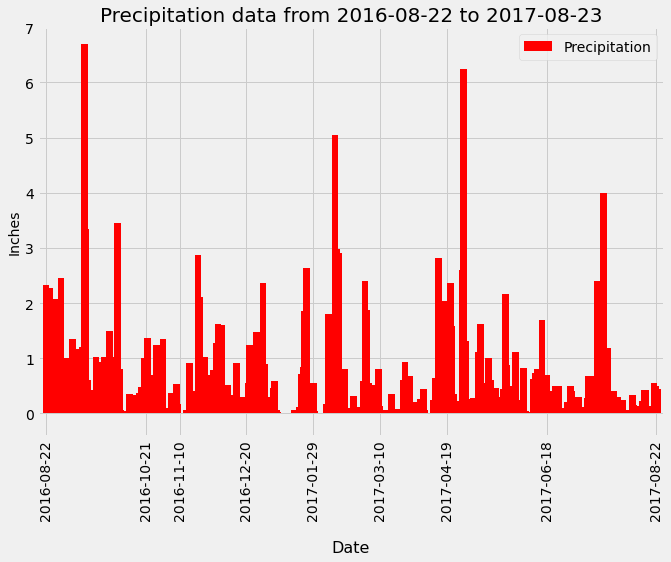

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
Precipitation_DF.plot.bar(color='r',fontsize = 10,figsize=(10,7),width=4)
plt.xlabel('Date',fontsize=16,color='black',labelpad=20)
plt.ylabel("Inches",fontsize = 14)
plt.xlim(-5,370)
plt.ylim(-0.4,7)
plt.yticks(size=14)
plt.xticks((0,60,80,120,160,200,240,300,365),fontsize=14)
plt.title("Precipitation data from 2016-08-22 to 2017-08-23",fontsize = 20)
plt.savefig('Output/barplot_Perc_Data.png', bbox_inches = "tight")
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Prec_summary=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=Last_Date).all()
Prec_summary_DF=pd.DataFrame(Prec_summary,columns=["Date","Precipitation"])
Prec_summary_DF.dropna()
Prec_summary_DF.describe()

Precipitation
count    2026.000000
mean        0.179437
std         0.463989
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

# Exploratory Station Analysis

In [16]:
Col=inspector.get_columns('Station')
for c in Col:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
# Design a query to calculate the total number stations in the dataset
Total_stations=session.query(Station).count()
Total_stations 


9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Active_stations=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()
Active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Active_station_temp=session.query(Measurement.station,\
                                  func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
                                  .filter(Measurement.station=='USC00519281').all()
Active_station_temp


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [20]:
Active_station_temp_DF=pd.DataFrame(Active_station_temp,columns=['Station','min','max','avg'])
Active_station_temp_DF

Station   min   max        avg
0  USC00519281  54.0  85.0  71.663781

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temp_Obsvn=session.query(Measurement.date,Measurement.tobs)\
.filter(Measurement.station=='USC00519281',Measurement.date>Last_Date).all()
Temp_Obsvn

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [22]:
Temp_Obsvn_DF=pd.DataFrame(Temp_Obsvn,columns=['Date','Temperature'])
Temp_Obsvn_DF.set_index('Date',inplace=True)
Temp_Obsvn_DF

Temperature
Date                   
2016-08-23         77.0
2016-08-24         77.0
2016-08-25         80.0
2016-08-26         80.0
2016-08-27         75.0
...                 ...
2017-08-14         77.0
2017-08-15         77.0
2017-08-16         76.0
2017-08-17         76.0
2017-08-18         79.0

[352 rows x 1 columns]

In [23]:

Temp_Obsvn_DF.plot.hist(bins=12,figsize=(10,7))#,alpha=0.6,linewidth=1,)
plt.ylabel("Frequency",fontsize = 14)
plt.xlabel("Temperature",fontsize=14)
plt.title("Temperature observation Data for station 'USC00519281' from 2016-08-22 to 2017-08-23",fontsize = 20)
plt.savefig('Output/hist_TOBS.png', bbox_inches = "tight")
plt.show()

# Close session

In [24]:
# Close Session
session.close()